# Euclidean Rhythms

Euclidean Rhythms were discovered in 2004 and first described in [this paper](http://cgm.cs.mcgill.ca/~godfried/publications/banff.pdf). 

Euclidean Rhythms inherit their name from the Euclidean algorithm, one of the oldest recorded algorithms in human history. Most of the popular rhythms across millenia and cultures have a structure that can be defined by the Euclidean algorithm - we term them Euclidean rhythms when such a homology exists. Intuitivivley, as we'll see more later, Euclidean rhythms are characterized by maximum evenness of spacing. Because of their ubiquity in the musical preferences of diverse cultures, many of whom aren't known to have exchanged cultural materials, Euclidean rhythms suggest an evolved biological tendency of human perception. Their discovery is one of the major acheivments of contemporary comparitive musicology. 

The Bjorlund algorithm has the same structure as the Euclidean algorithm but is intended to ouput sequences of binary units. The Bjorklund algorithm is typically used to generate Euclidean rhythms because its format is very conveinent for representing temporal sequences. 


### Intuition 
Bjorklund sequences are binary sequences characterized by spacing that is as even as possible. 

This is a Bjorklund sequence:

0 1 0 1 0 1 1

This is not:

0 0 0 1 1 1 1

Individual Bjorklund sequences can be defined by three parameters:

- the number of "on" elements in the sequence - *pulses*
- the number of total elements in the sequence - *steps*
- an optional third parameter - *rotation*

Rotation is a little difficult to visualize when using linear sequential notation, but imagine a circular sequence like a clock where every third hour was "on". Expressed linearly, it would look like this:

1 0 0 1 0 0 1 0 0 1 0 0

And if you rotated all the "on"s one hour clockwise, it would look like this:

0 1 0 0 1 0 0 1 0 0 1 0

It's an identical sequence with a different rotation. Linearly, this is expressed by severing some of the end and tacking it onto the beginning. 

This is very musically relevant because the "same" sequences will sound very different rotated. In ethnomusicology, rhythms that are rotations of each other are said to be of the same "rhythmic necklace".

The euclid.py module contains a function that generates bjorklund sequences, adapted from the [original paper's](https://ics-web.sns.ornl.gov/timing/Rep-Rate%20Tech%20Note.pdf) C code. If you're interested in how the algorithm works, there's a good intuitive description [here](http://cgm.cs.mcgill.ca/~godfried/publications/banff.pdf) and a full technical description in the paper. 


In [6]:
from euclid import bjorklund

The bjorklund function takes two or three arguments: pulses, steps, and (optional) rotation. Pulses has to be less than steps or an error will be raised.

In [8]:
bjorklund(3, 5)

[1, 0, 1, 0, 1]

In [9]:
bjorklund(3, 5, 1)

[0, 1, 0, 1, 1]

In [10]:
bjorklund(4, 8)

[1, 0, 1, 0, 1, 0, 1, 0]

In [18]:
bjorklund(17, 25, 13)

[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]

One approach to applying these binary sequences to music21 streams is to "slice" the stream at offsets specified by the bjorklund sequence. To show how this can work, we'll start with a simple whole note.

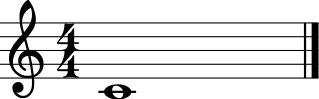

In [139]:
import music21
stream = music21.stream.Stream()
note= music21.note.Note()
note.quarterLength=4
stream.append(note)
stream.show()
render(stream, 'output/euclid/wholenote.wav')
IPython.display.Audio(filename='./output/euclid/wholenote.wav')

The first thing we'll need to do is to produce a binary sequence using our bjorklund function. Then we'll need to convert the binary sequence into a list of durations that specifies the onset of the pulse. The most pervasive unit of time in which music21 deals with duration is the quarterLength, so we're shooting for a list of onsets specified in quarterLengths. 

In [127]:
euclidBinary = bjorklund(4, 7, 0)
print(euclidBinary)

[1, 0, 1, 0, 1, 0, 1]


In [128]:
euclidQuarterLengths = []
for i in range(0, len(euclidBinary)):
        if euclidBinary[i] == 1:
            euclidQuarterLengths.append((stream.duration.quarterLength/len(euclidBinary))*i)

print(euclidQuarterLengths)

[0.0, 1.1428571428571428, 2.2857142857142856, 3.4285714285714284]


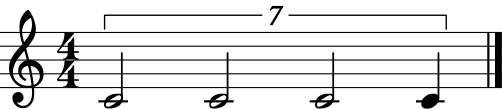

In [131]:
streamSlice = stream.sliceAtOffsets(euclidQuarterLengths, addTies=False)
streamSlice.show()
render(streamSlice, 'output/euclid/slice.wav')
IPython.display.Audio(filename='output/euclid/slice.wav')

Now, this produced some pretty legible output. Note, however, that there are many situations when using the "slice at offsets" technique can lead to some very illegible notation. This isn't neccisarily a bad thing all of the time... especially if you only care about obtaining midi output for a sequencer, in which case the notational legibility isn't concerning, but it's worth keeping in mind. 

Let's encapsulate everything we've done so far into a 'euclidize' function. It will take as input a stream, the length (in quarterLengths) of the expanse we're trying to split, and our three bjorklund parameters. 

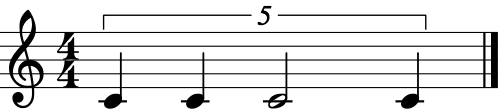

In [133]:
def euclidize(stream, length, pulses, steps, rotation=0):
    euclidBinary = bjorklund(pulses, steps, rotation)
    #convert the binary into a list of quarter lengths
    euclidQuarterLengths = []
    for i in range(0, len(euclidBinary)):
        if euclidBinary[i] == 1:
            euclidQuarterLengths.append((length/steps)*i)
    return stream.sliceAtOffsets(euclidQuarterLengths, addTies=False)

##### WHY DID YOU HAVE TO REMOVE THE INPLACE = TRUE HERE? FIGURE OUT AND UPDATE THE MODULE ACCORDINGLY

stream = music21.stream.Stream()
note= music21.note.Note()
note.quarterLength=4
stream.append(note)
euclidStream = euclidize(stream, 4, 4, 5, 2)
euclidStream.show()
render(euclidStream, 'output/euclid/euclidize.wav')
IPython.display.Audio(filename='output/euclid/euclidize.wav')

Now we can loop through an entire score and randomly 'euclidize' it !

So far, we've been working with bjorklund sequences by slicing preexisting material. This isn't the only possibility, however; for example, we could generate a sequence 'from scratch' but iterating through a bjorklund sequence. 

In [3]:
stream2 = music21.stream.Stream()

In [4]:
targetLength = 8

In [7]:
euclidBinary = bjorklund(21, 24, 0)
print(euclidBinary)

[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]


In [8]:
step = targetLength/len(euclidBinary)
for i in range(0, len(euclidBinary)):
        if euclidBinary[i] == 1:
            note = music21.note.Note()
            note.duration.quarterLength=step
            stream2.append(note)
        else:
            rest = music21.note.Rest()
            rest.duration.quarterLength=step
            stream2.append(rest)

In [80]:

from midi2audio import FluidSynth
mf = music21.midi.translate.streamToMidiFile(stream2)
mf.open('midi.mid', 'wb')
mf.write()
mf.close()
fs = FluidSynth()
fs.midi_to_audio('midi.mid', 'output1.wav')


In [81]:
music21.midi.realtime.StreamPlayer(stream2).play()

One of the advantages of this approach is that it produces legible notation more consistently.

In [79]:
FluidSynth().play_midi('midi.mid')

In [117]:
render(stream2, 'output/test2.wav')

'output/test2.wav'

In [138]:
IPython.display.Audio(filename='output/test2.wav')

FileNotFoundError: [Errno 2] No such file or directory: 'output/test2.wav'